In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from tqdm import tqdm
from utils import create_translation_dic, get_uc_engineering_id
from enrollment_utils import get_enrollment_df, get_enrolled_ids_year
from grad_utils import get_graduation_df, get_grad_ids_year

In [14]:
years = list(range(2007, 2017))

# Enrollment

In [15]:
#Translates columns of enrollment dataframe from Spanish to English
enrollment_mapper = create_translation_dic("Enrollment") 
n_enrolled = []

for year in years:
    #Obtain enrollment data for certain year at UC
    df = get_enrollment_df(year, uc_eng_only=True, translation_mapper=enrollment_mapper) 
    n_enrolled.append(len(df))

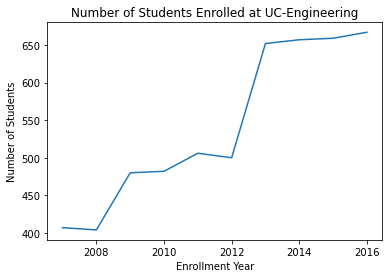

In [16]:
plt.plot(years, n_enrolled)
plt.title("Number of Students Enrolled at UC-Engineering")
plt.ylabel("Number of Students")
plt.xlabel("Enrollment Year")
plt.savefig("figs/uc_enrollment.pdf")

# Graduation

In [17]:
#Translates graduation dataframe from Spanish to English
graduation_mapper = create_translation_dic("Graduation") 
n_grad = []

for year in years:
    #Obtain graduation data for students admitted in a certain year at UC
    df = get_graduation_df(year, num_sem=None, translation_mapper=graduation_mapper, uc_eng_only=True) 
    n_grad.append(len(df))

100%|███████████████████████████████████████████| 14/14 [00:12<00:00,  1.08it/s]


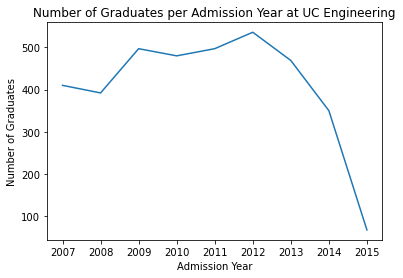

In [6]:
plt.plot(years, n_grad)
plt.xlabel("Admission Year")
plt.ylabel("Number of Graduates")
plt.title("Number of Graduates per Admission Year at UC Engineering")
plt.savefig("figs/uc_graduation.pdf")

# Intersection of Enrolled + Graduated IDs

In [19]:
print(years)
print(n_enrolled)
print(n_grad)

[2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]
[407, 404, 480, 482, 506, 500, 652, 657, 659, 667]
[410, 392, 497, 480, 497, 536, 469, 350, 67, 4]


It seems like the number of students admitted in a particular and eventually graduated is sometimes greater than the number of students who were enrolled in a particular year. This is strange!

In [8]:
# Get student IDs of students who were admitted in 2007 and graduated eventually.
grad_ids = get_grad_ids_year(2007) 

# Get student IDs of students who enrolled in 2007.
enrolled_ids = get_enrolled_ids_year(2007)

100%|███████████████████████████████████████████| 14/14 [00:12<00:00,  1.11it/s]


In [9]:
len(grad_ids), len(enrolled_ids), len(enrolled_ids.intersection(grad_ids))

(410, 407, 301)

In theory, we would expect the ``grad_ids`` from a particular year to be a subset of the ``enrolled_ids`` for a particular year. Somehow though, according to the enrollment data, 407 students enrolled in UC Engineering in 2007, while 410 students who started as a freshman at UC Engineering in 2007 graduated. This is somewhat strange because the number of students enrolled is less than the number of students who started in that year and eventually graduated. Furthermore, it seems like there are ~100 students who started as a freshman in 2007 and eventually graduated but weren't enrolled in 2007.